# Lesson 3: Array-oriented programming

Our analysis of Higgs data with NumPy arrays didn't use may `if` or `for` statements at all.

<br>

The general pattern consists of a single Python extension call that operates on many data values (_similar to_ "SIMD": Single Instruction, Multiple Data).

<br>

This pattern can be called a programming language paradigm, contrasted with "imperative," "functional," "object-oriented," etc.

In [1]:
import numpy as np

<br>

**Imperative programming:**

In [2]:
input_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
output_data = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
for i in range(len(input_data)):                                  # you say what happens to each element
    output_data[i] = input_data[i]**2                             # in an exactly specified order (for loop)
output_data

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

<br>

**Functional programming:**

In [3]:
input_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
output_data = np.fromiter(map(lambda x: x**2, input_data), int)   # you provide a function to be applied to
output_data                                                       # each element; may run in any order

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

<br>

**Array-oriented programming:**

In [4]:
input_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
output_data = input_data**2                                       # implicit indexes, no reference to individual
output_data                                                       # elements; function is hard-coded in C

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

Most array-oriented programming languages have been interactive, intended for data analysis or simulation.

(This is a list of _all_ array-oriented languages that I know about.)

<br>

<center>
<img src="img/apl-timeline.svg" width="75%">
</center>

They have also tended to be concise (for quick typing, reduced screen clutter).

<br>

The original, APL, was way too concise! (Needed a special keyboard for all the math symbols.)

<br>

<center>
<div style="display: inline-block">

| APL | <br> | Numpy |
|:---:|:----:|:-----:|
| <tt>ι4</tt> | <br> | <tt>np.arange(4)</tt> |
| <tt>(3+ι4)</tt> | <br> | <tt>np.arange(4) + 3</tt> |
| <tt>+/(3+ι4)</tt> | <br> | <tt>(np.arange(4) + 3).sum()</tt> |
| <tt>m ← +/(3+ι4)</tt> | <br> | <tt>m = (np.arange(4) + 3).sum()</tt> |

</div>

<img src="img/apl-keyboard.jpg" width="25%" style="display: inline-block; margin-left: 10%">

</center>

Development/debuggin interaction pattern in oridinary programming: step through instructions on each _value_ in a debugger (breakpoints, etc.)

<br>

Data analysis interaction pattern: stop after key _operations_ and look at _distributions_ of all values.

<br>

Example: suppose you have a million data points.

In [5]:
import matplotlib.pyplot as plt

<br>

In [6]:
dataset = np.random.normal(0, 1, 1000000)
dataset

array([ 0.91514266,  0.92395022,  0.59067835, ..., -0.38605771,
        0.77751723,  0.14181228])

<br>

(Seeing 6 numerical values doesn't tell us about the other 999994.)

"What does the distribution look like?"

<br>

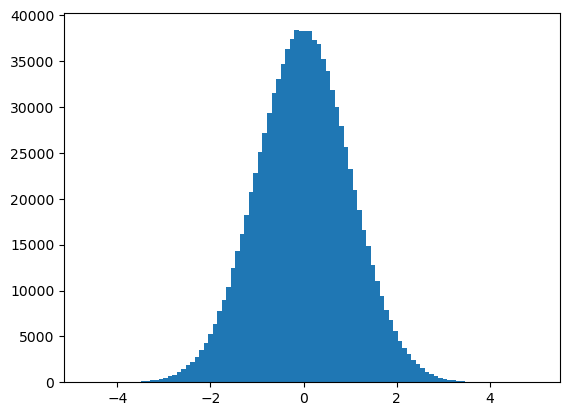

In [7]:
plt.hist(dataset, bins=100);

<br>

Of course, it's Gaussian/normal-distributed. (That's what we had asked for with `np.random.normal`.)

"What does its square look like?"

In [8]:
dataset2 = dataset**2

<br>

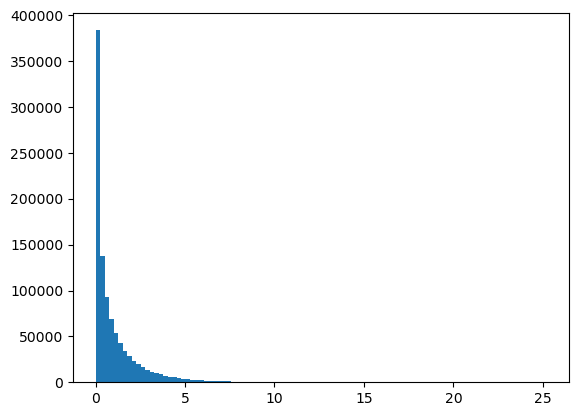

In [9]:
plt.hist(dataset2, bins=100);

<br>

"Of course. It's always positive, peaks at 0, and falls off to 9, rather than 3."

"What does this crazy combination look like?"

In [10]:
dataset3 = np.sin(1/dataset2)

<br>

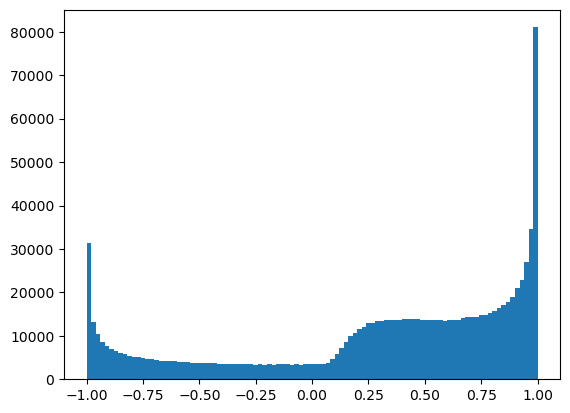

In [11]:
plt.hist(dataset3, bins=100);

<br>

I couldn't have guessed that shape: having the computer do it revealed something non-trivial.

History of paradigm-related words in CHEP titles & abstracts (Computing in HEP conferences from 1985 through present).

"Arrays" (originally, Fortran arrays) are making a comeback.

<br>

<center>
<img src="img/chep-papers-paradigm.svg" width="75%">
</center>